In [74]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib

In [18]:
am1 = np.array([[0,1,0,0],[1,0,1,0],[0,0,0,1],[0,0,0,0]])

def LHS(regulates_X):
    
    pre_LHS = np.array([[0,1,0,0],
                        [0,0,1,0],
                        [0,0,0,1],
                        [0,0,0,0]])
    
    if int(regulates_X) == 0:
        prod_LHS = pre_LHS + np.array([[1,0,0,0],
                                       [0,0,0,0],
                                       [0,0,0,0],
                                       [0,0,0,0]])
    elif int(regulates_X) == 1:
        prod_LHS = pre_LHS + np.array([[0,0,0,0],
                                       [1,0,0,0],
                                       [0,0,0,0],
                                       [0,0,0,0]])
    elif int(regulates_X) == 2:
        prod_LHS = pre_LHS + np.array([[0,0,0,0],
                                       [0,0,0,0],
                                       [1,0,0,0],
                                       [0,0,0,0]])
    else: print('error: Regulates_X = {}'.format(regulates_X))
        
        
    
    #add decay reaction LHS
    return np.hstack((prod_LHS,np.eye(4)))

In [16]:
positive_weights = [round(w,1) for e,w in nx.get_edge_attributes(g,'weight').items() if w > 0]

In [44]:
net_code = 4


array([[1., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.]])

In [35]:
sorted(list(g.edges(data=True)))

[(1, 0, {'weight': 1}),
 (0, 1, {'weight': 1}),
 (1, 2, {'weight': 1}),
 (2, 3, {'weight': 1})]

In [128]:
def viz_network(regulates_X, net_code, ax, title=''):
    g = nx.from_numpy_array(LHS(regulates_X)[:,:4], create_using=nx.MultiDiGraph)#, arrows=True, arrowsize=20)

    edge_signs = np.append(np.array(list(format(net_code,'03b')), dtype='int'),0) * 2 - 1
    edge_signs_ordered = [edge_signs[i] for i in [x[1] for x in list(g.edges(data=True))]]

    i=0
    for u,v,d in g.edges(data=True):
        d['weight'] = edge_signs_ordered[i]
        i += 1


    activating = [e for e,w in nx.get_edge_attributes(g,'weight').items() if w > 0]

    # weights of activating edges
    positive_weights = [round(w,1) for e,w in nx.get_edge_attributes(g,'weight').items() if w > 0]

    # tuples of nodes with deactivating edges
    deactivating = [e for e,w in nx.get_edge_attributes(g,'weight').items() if w < 0]

    # weights of deactivating edges
    negative_weights = [round(w,1) for e,w in nx.get_edge_attributes(g,'weight').items() if w < 0]

    # draw activating edges in blue, adjust width, add transparency

    pos = nx.shell_layout(g)

    # vary intensity of green according to level of activation
    graph_nodes = nx.draw_networkx_nodes(g, node_size=400, pos=pos, alpha=1, ax=ax, node_color='lightgreen')  

    labels = {0:'X', 1:'Y', 2:'Z',3:'G'}

    nx.draw_networkx_labels(g, pos=pos, ax=ax, labels = labels, )


    graph_act_edges =nx.draw_networkx_edges(g, edgelist=activating, ax=ax,
                           pos=pos, width=[5*abs(w)+1 for w in positive_weights], arrowsize=20, edge_color= '#0055FF',
                            alpha=0.6)

    # draw negative edges in red, adjust width by weight, add transparency to see negative edges below,
    graph_deact_edges = nx.draw_networkx_edges(g, edgelist=deactivating, ax=ax,
                           pos=pos, width=[5*abs(w)+1 for w in negative_weights], arrowsize=30, edge_color = '#FF0000',
                            alpha=0.6, arrowstyle=matplotlib.patches.ArrowStyle("|-|",widthA=0, widthB=0.3))
    ax.set_title(title, size=10)
    ax.set_axis_off()
    plt.axis('off')

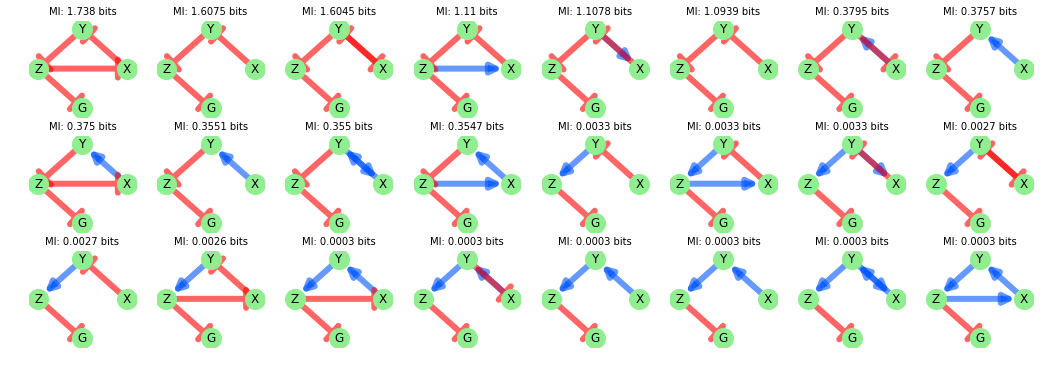

In [165]:
ranking = np.argsort(mi_list2)[::-1]

fig, axes = plt.subplots(3,8, figsize=(18,6))

for i in range(3):
    for j in range(8):
        viz_network(np.floor(ranking[8*i+j]/8), ranking[8*i+j] % 8, axes[i,j], 'MI: {} bits'.format(round(mi_list2[ranking[8*i + j]],4)))
plt.axis('off')
plt.show()

In [147]:
ranking[8*i+j]//8, ranking[8*i+j]%8#[9//8, 9%8]

23

In [132]:
mi_list2 = [1.60746487231342,0.00270407441061105,0.375704406306259,0.000348455357723765,1.09386062810714,0.00328873303562593,0.355065987053917,0.000338333929232437, 1.6045011109953,0.00271527496936752,0.37953827184751,0.00034895403909907,1.10780178875183,0.00328076691743284,0.355019817834805,0.000338318981172314,1.73798367071847,0.00261063502930714,0.375016900988111,0.000348966065106371,1.10995327403274,0.00328852724625106,0.354650284724816,0.000338271864501749]

In [157]:
(np.floor(16/8), np.floor(16%2))

(2.0, 0.0)

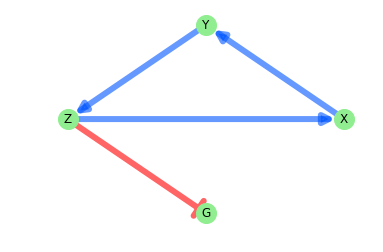

In [167]:
fig, ax = plt.subplots(1)
viz_network(2,7, ax)

In [162]:
ranking

array([16,  0,  8, 20, 12,  4, 10,  2, 18,  6, 14, 22,  5, 21, 13,  9,  1,
       17, 19, 11,  3,  7, 15, 23])